<a href="https://colab.research.google.com/github/ItsFRZ/Gingiva-Identification-MLP-Model/blob/main/GIngiva_MLP_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


In [4]:



def rgb2gray(rgb):
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

def imageGenerator(rgbImg,grayImg):
  for i in range(0,len(grayImg)):
    for j in range(0,len(grayImg[i])):
        value  = grayImg[i][j]
        if value > 175: # Ask ma'am for this value
          # grayImg[i][j] = 255
          valueChanger(rgbImg, i , j)


def valueChanger(rgbImg, i ,j):
  rgbImg[i][j][:] = [0,0,0]




In [5]:

p = Path("/content/drive/MyDrive/GHRCE/Dataset/Crop")

dirs = p.glob("*")



image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Thick" : 0 , "Thin" : 1};
label2patient = {0 : "Thick", 1 : "Thin"};




for folder_dir in dirs:
  label = str(folder_dir).split("/")[-1]

  cnt = 0;
  print(folder_dir);

  #Iterate over folder_dir and pick all images of patient
  for img_path in folder_dir.glob("*.JPG"):
    img = image.load_img(img_path,target_size=(90,240))   # image path and image size defined
    img_array = image.img_to_array(img)
    
    r2gImg = rgb2gray(img_array)
    imageGenerator(img_array,r2gImg)

    image_data.append(img_array)
    labels.append(label_dict[label])
    cnt += 1;

  print(cnt)

/content/drive/MyDrive/GHRCE/Dataset/Crop/Thick
79
/content/drive/MyDrive/GHRCE/Dataset/Crop/Thin
188


**Visualization**

In [6]:
print(len(image_data))
print(len(labels))

267
267


In [7]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(267, 90, 240, 3)
(267,)


In [8]:
import random
random.seed(10)

In [9]:
X = np.array(image_data)
Y = np.array(labels)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalization
X = X/255.0

In [10]:
print(Y)

[1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 1]


In [11]:
# # Draw some images

def drawImg(img,label):
  plt.title(label2patient[label])
  plt.imshow(img)
  plt.style.use("seaborn")
  plt.axis("off")
  plt.show()


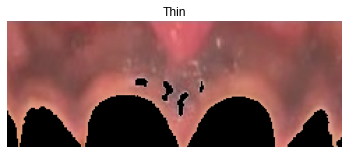

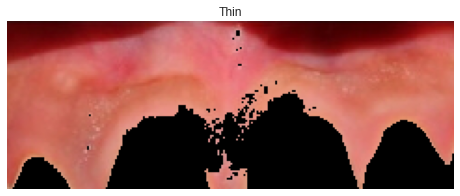

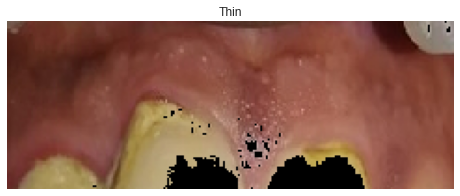

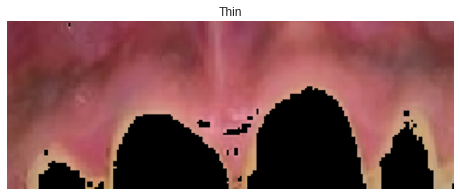

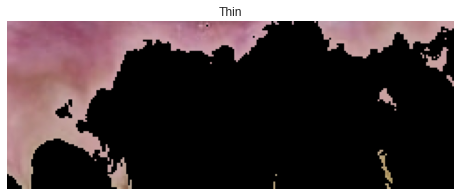

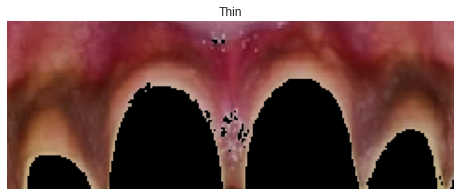

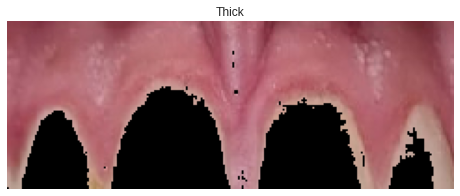

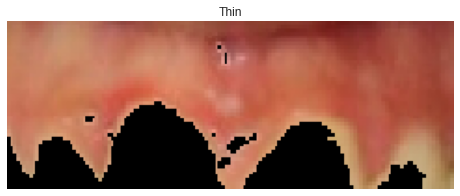

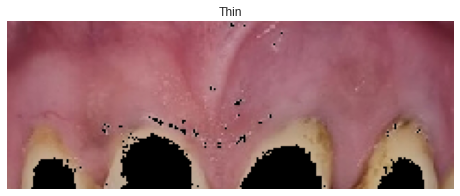

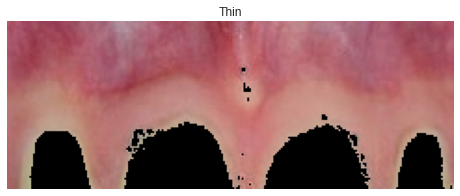

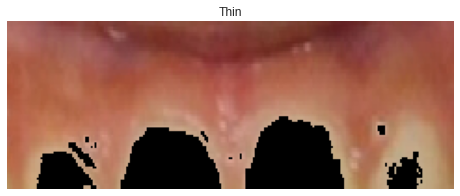

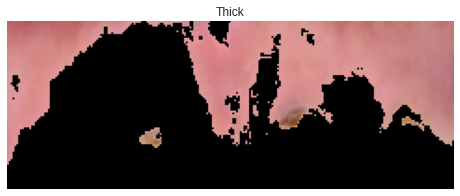

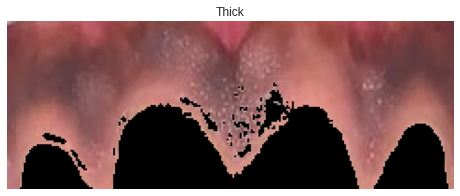

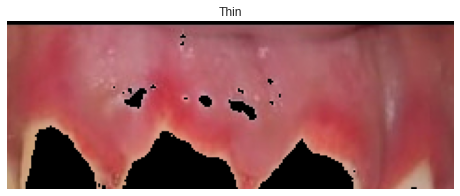

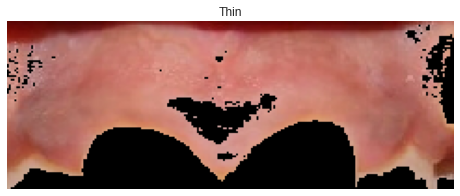

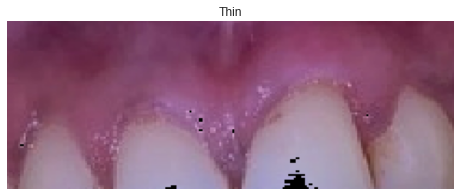

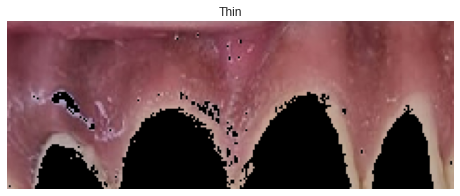

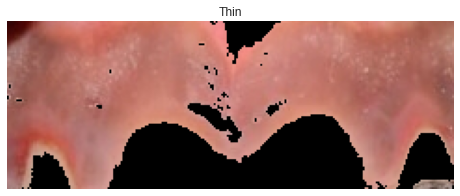

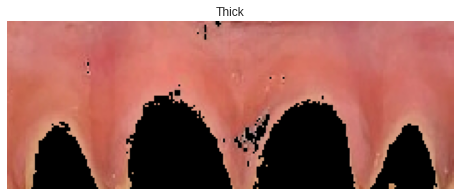

In [12]:
for i in range(1,20):
  drawImg(X[i],Y[i])

**Creating Training & Test Set**

In [13]:


split = int(X.shape[0]*.8);

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:split,:]
Y = Y[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]


print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)


(213, 90, 240, 3) (213,)
(54, 90, 240, 3) (54,)


**Building the Neural Network**

In [14]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa, axis=1, keepdims=True)
    return ans

In [15]:
class NeuralNetwork:
  def __init__(self, input_size, layers, output_size):
    np.random.seed(0)
    
    model = {} 
    
    #First Layer
    model['W1'] = np.random.randn(input_size, layers[0])
    model['b1'] = np.zeros((1, layers[0]))
    
    #Second Layer
    model['W2'] = np.random.randn(layers[0], layers[1])
    model['b2'] = np.zeros((1, layers[1]))
    
    #Third/Output Layer
    model['W3'] = np.random.randn(layers[1], output_size)
    model['b3'] = np.zeros((1, output_size))
    
    self.model = model
    self.activation_outputs = None
        
        
  def forward(self, x):
        
    W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
    b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
    
    z1 = np.dot(x, W1) + b1
    a1 = np.tanh(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = np.tanh(z2)
    
    z3 = np.dot(a2, W3) + b3
    y_ = softmax(z3)
    
    self.activation_outputs = (a1,a2,y_)
    return y_
        
  def backward(self, x, y, learning_rate=0.001):
        
    W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
    b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
    a1,a2,y_ = self.activation_outputs
    m = x.shape[0]
    
    delta3 = y_ - y
    dw3 = np.dot(a2.T, delta3)
    db3 = np.sum(delta3, axis=0)
    
    delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
    dw2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0)
    
    delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
    dw1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)
    
    #Update the model parameters using Gradient Descent
    self.model['W1'] -= learning_rate*dw1
    self.model['b1'] -= learning_rate*db1
    
    self.model['W2'] -= learning_rate*dw2
    self.model['b2'] -= learning_rate*db2
        
    self.model['W3'] -= learning_rate*dw3
    self.model['b3'] -= learning_rate*db3
        
  def predict(self,x):
    y_out = self.forward(x)
    return np.argmax(y_out, axis=1)
    
  def summary(self):
        
    W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
    a1,a2,y_ = self.activation_outputs
    
    print('W1', W1.shape)
    print('A1', a1.shape)
    
    print('W2', W2.shape)
    print('A2', a2.shape)
    
    print('W3', W3.shape)
    print('Y_', y_.shape)


In [16]:
def loss(y_oht, p):
    
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [17]:
def train(X, Y, model, epochs, learning_rate, logs=True):
    
    training_loss = []
    
    classes = 3
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        training_loss.append(l)
        model.backward(X, Y_OHT, learning_rate)
        
        if(logs):
            print('Epoch %d Loss %.4f' %(ix,l)  )
    
    return training_loss

In [18]:
model = NeuralNetwork(input_size=64800, layers=[100,50], output_size=3) #120000 features(200*200*3)
print(X.shape)

(213, 90, 240, 3)


In [19]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0], -1  )
print(XTest.shape) 

(213, 64800)
(54, 64800)


In [20]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 2.2654
Epoch 1 Loss 1.5866
Epoch 2 Loss 1.1346
Epoch 3 Loss 0.9271
Epoch 4 Loss 0.8964
Epoch 5 Loss 0.8129
Epoch 6 Loss 0.7568
Epoch 7 Loss 0.7339
Epoch 8 Loss 0.7169
Epoch 9 Loss 0.6986
Epoch 10 Loss 0.6730
Epoch 11 Loss 0.6432
Epoch 12 Loss 0.6238
Epoch 13 Loss 0.5957
Epoch 14 Loss 0.5786
Epoch 15 Loss 0.5635
Epoch 16 Loss 0.5387
Epoch 17 Loss 0.5426
Epoch 18 Loss 0.5323
Epoch 19 Loss 0.5122
Epoch 20 Loss 0.4786
Epoch 21 Loss 0.4707
Epoch 22 Loss 0.4736
Epoch 23 Loss 0.4549
Epoch 24 Loss 0.4475
Epoch 25 Loss 0.4380
Epoch 26 Loss 0.4288
Epoch 27 Loss 0.4200
Epoch 28 Loss 0.4098
Epoch 29 Loss 0.3945
Epoch 30 Loss 0.4002
Epoch 31 Loss 0.3847
Epoch 32 Loss 0.3787
Epoch 33 Loss 0.3679
Epoch 34 Loss 0.3600
Epoch 35 Loss 0.3635
Epoch 36 Loss 0.3559
Epoch 37 Loss 0.3591
Epoch 38 Loss 0.3415
Epoch 39 Loss 0.3310
Epoch 40 Loss 0.3241
Epoch 41 Loss 0.3195
Epoch 42 Loss 0.3164
Epoch 43 Loss 0.3112
Epoch 44 Loss 0.3067
Epoch 45 Loss 0.3031
Epoch 46 Loss 0.2994
Epoch 47 Loss 0.2951
Ep

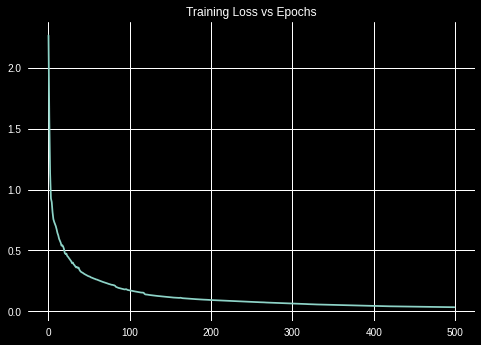

In [21]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.title('Training Loss vs Epochs')
plt.plot(l)
plt.show()

In [22]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

print('Train Accuracy %.4f' %getAccuracy(X,Y,model))
print('Testing Accuracy %.4f' %getAccuracy(XTest,YTest,model))

Train Accuracy 0.9718
Testing Accuracy 0.6296


**Overfitting**

In [23]:
from sklearn.metrics import classification_report

In [24]:
outputs = model.predict(X)
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.97      0.98       158

    accuracy                           0.97       213
   macro avg       0.95      0.98      0.96       213
weighted avg       0.97      0.97      0.97       213



In [25]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.71      0.71      0.71        34

    accuracy                           0.63        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.63      0.63      0.63        54

